# Preliminary Data Analysis for the Jin - Hafix Disinformation Index

Our first attempt at this analysis produced a correlation matrix and heatmap which depicted the strengths of associations between mask-wearing rates, non-medical exemption (NME) rates for vaccinations, and climate change disbelief rates (please see the "Data Sources" document for details on these datasets). However, there were no observable associations.

The current task is to create multipliers for factors that affect the disinformation index. We will use feature selection to approach this problem, and focus on one outcome at a time. Opinions on climate change and NME rates might be more nuanced than we think, affected by microcultural factors. Let's just take a look at mask-wearing rates to begin with.

The variables we are looking at to find possible predictors: *Race, gender, poverty status, education, unemployment, Internet access.*  
The variable we are seeking to understand as an outcome of these predictors: *Mask-wearing, Climate Change Opinion, and Non-medical exemptions to vaccination *

In [1]:
# Import packages.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

# This probably isn't best practice.
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Get census data.
census = pd.read_csv("~/Downloads/cc-est2019-alldata.csv",encoding = "ISO-8859-1")

In [3]:
# Reduce census data to only include 2019.
census = census[(census['YEAR'] ==12)]

# Reduce census data to include all ages; we can divide it by age group in further analysis.
census = census[(census['AGEGRP'] == 0)]

In [4]:
# Adjust census data column values to match FIPS values for other datasets.
census['COUNTY'] = census['STATE']*1000+census['COUNTY']

# Rename column to 'FIPS' to match other datasets.
census = census.rename(columns={'COUNTY': 'FIPS'})

# However, the the first (alphabetically) FIPS codes are four digits; they should be five. 
# The other FIPS codes match; we only need to fix these.

# Convert to string data type.
census['FIPS'] = census['FIPS'].astype(str)

# Where the code is less than five digits, add a zero in front. 
census['FIPS'] = census['FIPS'].str.zfill(5)

We want to examine race and gender as possible predictors of mask-wearing. We're just going to check for association between male and mask-wearing, instead of both male and female. The census survey methodology does not seem to account for more than two genders. Therefore, male + female proportions will approximate a whole. So, we only need to look at one.

Additionally, we will only be checking for association between White-alone racial identity and mask-wearing, instead of checking all races. Other published analyses have found that rates of not wearing masks consistently are highest among white populations; for simplicity's sake, we will begin with one racial identity group first. 

In [5]:
# Creating column for male gender as a proportion of the total population. 
census["MALE_PROP"] = (census["TOT_MALE"] / census["TOT_POP"]).astype(float)

# Creating column for White racial identity as a proportion of the total population.
census["WA_PROP"] = ((census["WA_MALE"] + census["WA_FEMALE"])/census["TOT_POP"]).astype(float)

In [6]:
census.head(5)

,SUMLEV,STATE,FIPS,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE,MALE_PROP,WA_PROP
209,50,1,01001,Alabama,Autauga County,12,0,55869,27092,28777,...,89,93,40,27,15,19,16,11,0.484920,0.762623
437,50,1,01003,Alabama,Baldwin County,12,0,223234,108247,114987,...,268,281,264,197,69,65,55,35,0.484904,0.874410
665,50,1,01005,Alabama,Barbour County,12,0,24686,13064,11622,...,63,50,61,26,1,0,14,8,0.529207,0.491534
893,50,1,01007,Alabama,Bibb County,12,0,22394,11929,10465,...,32,19,6,15,5,1,17,3,0.532687,0.767661
1121,50,1,01009,Alabama,Blount County,12,0,57826,28472,29354,...,76,58,67,66,18,21,34,21,0.492374,0.958254


In [7]:
census

,SUMLEV,STATE,FIPS,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE,MALE_PROP,WA_PROP
209,50,1,01001,Alabama,Autauga County,12,0,55869,27092,28777,...,89,93,40,27,15,19,16,11,0.484920,0.762623
437,50,1,01003,Alabama,Baldwin County,12,0,223234,108247,114987,...,268,281,264,197,69,65,55,35,0.484904,0.874410
665,50,1,01005,Alabama,Barbour County,12,0,24686,13064,11622,...,63,50,61,26,1,0,14,8,0.529207,0.491534
893,50,1,01007,Alabama,Bibb County,12,0,22394,11929,10465,...,32,19,6,15,5,1,17,3,0.532687,0.767661
1121,50,1,01009,Alabama,Blount County,12,0,57826,28472,29354,...,76,58,67,66,18,21,34,21,0.492374,0.958254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715445,50,56,56037,Wyoming,Sweetwater County,12,0,42343,21808,20535,...,83,73,212,196,33,36,16,9,0.515032,0.937534
715673,50,56,56039,Wyoming,Teton County,12,0,23464,12142,11322,...,25,23,105,81,16,15,12,7,0.517474,0.949753
715901,50,56,56041,Wyoming,Uinta County,12,0,20226,10224,10002,...,17,23,82,111,3,12,8,2,0.505488,0.953080
716129,50,56,56043,Wyoming,Washakie County,12,0,7805,3963,3842,...,7,9,54,59,7,8,4,2,0.507751,0.945163


Next, we will bring in datasets for the four other factors we want to examine: poverty status, education, unemployment, and Internet access. Similar to the race and gender proportion columns, we will create columns of each status we are interested in as a proportion of total population. 

In [8]:
# Get poverty status data. 
poverty = pd.read_csv("~/Downloads/ACSDT5Y2019.B17005_data_with_overlays_2021-01-20T235335.csv",encoding = "ISO-8859-1")

# Remove the first row, which has another set of column names.
poverty = poverty.iloc[1:]

# Creating column for population below poverty level in the last year as proportion of total population in this survey.
poverty["B17005_002E"] = poverty["B17005_002E"].astype(float)
poverty["B17005_001E"] = poverty["B17005_001E"].astype(float)
poverty["POV_PROP"] = poverty["B17005_002E"] / poverty["B17005_001E"]

# We need to create a column for the FIPS code, so we can merge our newly created POV_PROP column with other data.
# The GEO_ID column has a lengthy code, the last five digits of which is our FIPS code. 
# We'll be doing this for the other datasets as well. 

# Slicing the last 5 digits from the GEO_ID.
poverty["FIPS"]= poverty["GEO_ID"].str.slice(-5) 

In [9]:
# Get educational attainment data. 
education = pd.read_csv("~/Downloads/ACSST5Y2019.S1501_data_with_overlays_2021-01-14T191030.csv",
                        encoding = "ISO-8859-1")

# Remove the first row, which has another set of column names.
education = education.iloc[1:]

# Creating column for proportion of people 25 years and over that do not have any college degree. 
education["S1501_C01_006E"] = education["S1501_C01_006E"].astype(float)
education["S1501_C01_007E"] = education["S1501_C01_007E"].astype(float)
education["S1501_C01_008E"] = education["S1501_C01_008E"].astype(float)
education["S1501_C01_009E"] = education["S1501_C01_009E"].astype(float)
education["S1501_C01_010E"] = education["S1501_C01_010E"].astype(float)

education["ED_PROP"] = (education["S1501_C01_007E"] + education["S1501_C01_008E"] + education["S1501_C01_009E"] 
                        + education["S1501_C01_010E"]) / education["S1501_C01_006E"]

# Slicing the last 5 digits from the GEO_ID.
education["FIPS"]= education["GEO_ID"].str.slice(-5)

In [10]:
# Get unemployment data. 
unemployment = pd.read_csv("~/Downloads/ACSST5Y2019.S2301_data_with_overlays_2021-01-16T111928.csv",
                           encoding = "ISO-8859-1")

# Remove the first row, which has another set of column names.
unemployment = unemployment.iloc[1:]

# This dataset already has the figure we are looking for; unemployment rate for people 20-64 years old. 
# The column is "S2301_C04_021E". This seems to be a percentage; let's convert it to a proportion for consistency.
unemployment["S2301_C04_021E"] = unemployment["S2301_C04_021E"].astype(float)
unemployment["UNEMP_PROP"] = (unemployment["S2301_C04_021E"] / 100)

# So, all we need is to create a column for the FIPS code.
# Slicing the last 5 digits from the GEO_ID.
unemployment["FIPS"]= unemployment["GEO_ID"].str.slice(-5)

In [11]:
# Get Internet access data.
internet = pd.read_csv("~/Downloads/ACSDT1Y2019.B28002_data_with_overlays_2021-01-19T103125.csv",
                           encoding = "ISO-8859-1")

# Remove the first row, which has another set of column names.
internet = internet.iloc[1:]

# Creating column for proportion of people that either have Internet access without a subsciption, or no access. 
internet["B28002_012E"] = internet["B28002_012E"].astype(float)
internet["B28002_013E"] = internet["B28002_013E"].astype(float)
internet["B28002_001E"] = internet["B28002_001E"].astype(float)

internet["INT_PROP"] = (internet["B28002_012E"] + internet["B28002_013E"]) / internet["B28002_001E"]

# Slicing the last 5 digits from the GEO_ID.
internet["FIPS"]= internet["GEO_ID"].str.slice(-5)

Next, we'll take a look at the data for the outcome we are currently interested in understanding: mask use by county. 

There are five survey responses that are columns in this dataset: "always", "frequently", "sometimes", "rarely", and "never." It is possible that due to the perception that a "never" response would be ill-received or judged in a certain light, respondents that actually relate to the "never" category may have responded "rarely" or "sometimes".  It might be helpful to combine the "never" and "rarely" categories, to obtain one category that can be understood to represent "low mask usage".

In [12]:
# Get mask use data.
mask = pd.read_csv("~/Downloads/mask-use-by-county.csv", encoding = "ISO-8859-1")

# Creating column to combine "never" and "rarely" survey responses.
mask["NEVER"] = mask["NEVER"].astype(float)
mask["RARELY"] = mask["RARELY"].astype(float)
mask["LOW_USE"] = mask["NEVER"] + mask["RARELY"]

# We need to create a column for the FIPS code. 
# There is a column that seems to contain this code, but like the census data, some are missing the first digit. 
# The first few FIPS codes are four digits; they should be five.

# Convert to string data type.
mask["COUNTYFP"] = mask["COUNTYFP"].astype(str)

# Where the code is less than five digits, add a zero in front. 
mask["FIPS"] = mask["COUNTYFP"].str.zfill(5)

In [13]:
# Time to merge the columns we've created in each dataset with the census data.
# From the "poverty" dataframe: poverty["POV_PROP"]
# From the "education" dataframe: education["ED_PROP"]
# From the "unemployment" dataframe: unemployment["UNEMP_PROP"]
# From the "internet" dataframe: internet["INT_PROP"]
# From the "mask" dataframe: mask["LOW_USE"]
# Merging on FIPS

census_joined = pd.merge(census, poverty[['FIPS','POV_PROP']],on='FIPS', how='left')
census_joined = pd.merge(census_joined, education[['FIPS','ED_PROP']],on='FIPS', how='left')
census_joined = pd.merge(census_joined, unemployment[['FIPS','UNEMP_PROP']],on='FIPS', how='left')
census_joined = pd.merge(census_joined, internet[['FIPS','INT_PROP']],on='FIPS', how='left')
census_joined = pd.merge(census_joined, mask[['FIPS','LOW_USE']],on='FIPS', how='left')

In [14]:
census_joined.head(5)

,SUMLEV,STATE,FIPS,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE,MALE_PROP,WA_PROP,POV_PROP,ED_PROP,UNEMP_PROP,INT_PROP,LOW_USE
0,50,1,01001,Alabama,Autauga County,12,0,55869,27092,28777,...,19,16,11,0.484920,0.762623,0.132707,0.650226,0.035,NaN,0.127
1,50,1,01003,Alabama,Baldwin County,12,0,223234,108247,114987,...,65,55,35,0.484904,0.874410,0.095816,0.586902,0.040,0.131029,0.142
2,50,1,01005,Alabama,Barbour County,12,0,24686,13064,11622,...,0,14,8,0.529207,0.491534,0.250535,0.812180,0.094,NaN,0.188
3,50,1,01007,Alabama,Bibb County,12,0,22394,11929,10465,...,1,17,3,0.532687,0.767661,0.157835,0.822674,0.070,NaN,0.054
4,50,1,01009,Alabama,Blount County,12,0,57826,28472,29354,...,21,34,21,0.492374,0.958254,0.121823,0.743761,0.031,NaN,0.167


In [15]:
# INT_PROP is looking sparse. 
# Checking to see how many NaN values there are, as a proportion of total rows.  
census_joined["INT_PROP"].isna().sum() / len(census_joined.index)

0.7361553150859326

In [16]:
# Looks like our Internet data was missing a lot of counties. 
# We'll have to omit Internet access as a factor for now; we can revisit this later. 

# Just checking the location (index) of the columns we'll be referring to. 
columns = census_joined.columns

# X variables:
race_loc = columns.get_loc("WA_PROP")
gender_loc = columns.get_loc("MALE_PROP")
pov_loc = columns.get_loc("POV_PROP")
ed_loc = columns.get_loc("ED_PROP")
unemp_loc = columns.get_loc("UNEMP_PROP")

# Y variable: 
mask_loc = columns.get_loc("LOW_USE")

print("X variables are located at:" + str(gender_loc) + "," + str(race_loc) + "," + str(pov_loc) 
      + "," + str(ed_loc) + "," + str(unemp_loc))
print("Y variable is located at:" + str(mask_loc))

X variables are located at:80,81,82,83,84
Y variable is located at:86


Now that our data is formatted properly, we can use feature selection. We have numerical inputs and a numerical output; so, the best move is to approach this as a regression predictive modeling problem. We will compute Pearon's correlation coefficient to understand our data. We could also calculate Spearman's rank coefficient, but Pearson is more likely to be useful to us. Spearman is generally more appropriate for data involving ranks, i.e. ordinal data.

Before we calculate the scores we need, let's take a look at some plots. 

,MALE_PROP,WA_PROP,POV_PROP,ED_PROP,UNEMP_PROP,LOW_USE
MALE_PROP,1.000000,0.091801,-0.028744,0.196083,-0.030586,0.073148
WA_PROP,0.091801,1.000000,-0.443696,-0.064983,-0.499384,0.221081
POV_PROP,-0.028744,-0.443696,1.000000,0.469082,0.620972,0.026019
ED_PROP,0.196083,-0.064983,0.469082,1.000000,0.364094,0.235640
UNEMP_PROP,-0.030586,-0.499384,0.620972,0.364094,1.000000,-0.152238
LOW_USE,0.073148,0.221081,0.026019,0.235640,-0.152238,1.000000


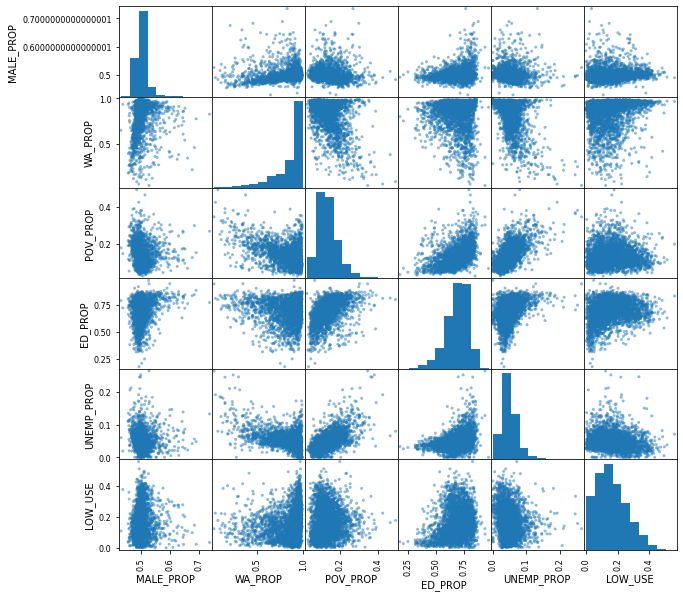

In [17]:
# Defining our x/independent and y/dependent variables.
x = census_joined.iloc[:,80:85]
y = census_joined.iloc[:,-1:]

# Making a scatterplot.
plt.rcParams['figure.figsize'] = [10, 10]
scatter = pd.concat([x,y], axis = 1)
pd.plotting.scatter_matrix(scatter)

# Table of correlations
scatter.corr()

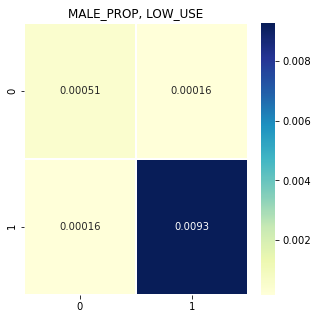

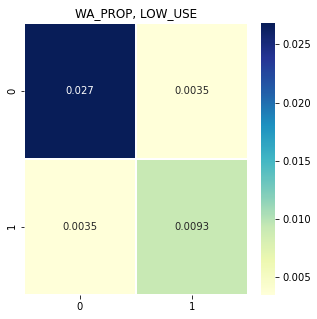

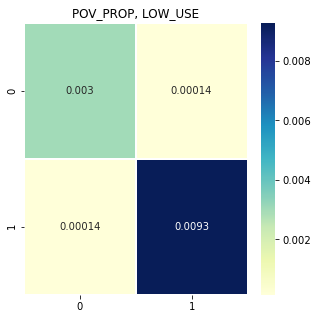

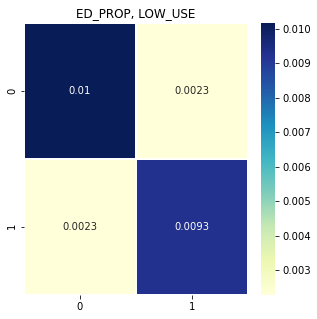

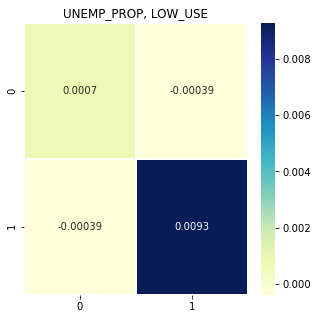

In [18]:
# Making separate coviariance tables.

# MALE_PROP, LOW_USE
plt.rcParams['figure.figsize'] = [5, 5]
male_cov = np.asarray(census_joined["MALE_PROP"])
mask_cov = np.asarray(census_joined["LOW_USE"])
ax = plt.axes()
sns.heatmap(np.cov(male_cov, mask_cov,bias=True), ax = ax, annot = True, linewidths=.5, cmap="YlGnBu")
ax.set_title('MALE_PROP, LOW_USE')
plt.show()

# WA_PROP, LOW_USE
wa_cov = np.asarray(census_joined["WA_PROP"])
ax = plt.axes()
sns.heatmap(np.cov(wa_cov, mask_cov,bias=True), ax = ax, annot = True, linewidths=.5, cmap="YlGnBu")
ax.set_title('WA_PROP, LOW_USE')
plt.show()

# POV_PROP, LOW_USE
pov_cov = np.asarray(census_joined["POV_PROP"])
ax = plt.axes()
sns.heatmap(np.cov(pov_cov, mask_cov,bias=True), ax = ax, annot = True, linewidths=.5, cmap="YlGnBu")
ax.set_title('POV_PROP, LOW_USE')
plt.show()

# ED_PROP, LOW_USE
ed_cov = np.asarray(census_joined["ED_PROP"])
ax = plt.axes()
sns.heatmap(np.cov(ed_cov, mask_cov,bias=True), ax = ax, annot = True, linewidths=.5, cmap="YlGnBu")
ax.set_title('ED_PROP, LOW_USE')
plt.show()

# UNEMP_PROP, LOW_USE
unemp_cov = np.asarray(census_joined["UNEMP_PROP"])
ax = plt.axes()
sns.heatmap(np.cov(unemp_cov, mask_cov,bias=True), ax = ax, annot = True, linewidths=.5, cmap="YlGnBu")
ax.set_title('UNEMP_PROP, LOW_USE')
plt.show()

In [19]:
# Pearsons
from scipy.stats import pearsonr
pearson_df = census_joined[["MALE_PROP", "WA_PROP", "POV_PROP", "ED_PROP", "UNEMP_PROP", "LOW_USE"]]

pearson_df.corr(method='pearson', min_periods=1)

,MALE_PROP,WA_PROP,POV_PROP,ED_PROP,UNEMP_PROP,LOW_USE
MALE_PROP,1.000000,0.091801,-0.028744,0.196083,-0.030586,0.073148
WA_PROP,0.091801,1.000000,-0.443696,-0.064983,-0.499384,0.221081
POV_PROP,-0.028744,-0.443696,1.000000,0.469082,0.620972,0.026019
ED_PROP,0.196083,-0.064983,0.469082,1.000000,0.364094,0.235640
UNEMP_PROP,-0.030586,-0.499384,0.620972,0.364094,1.000000,-0.152238
LOW_USE,0.073148,0.221081,0.026019,0.235640,-0.152238,1.000000


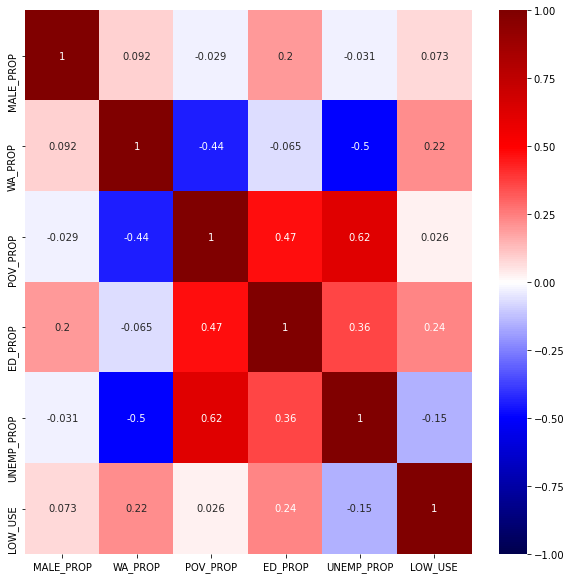

In [36]:
sns.heatmap(pearson_df.corr(), vmin=-1, vmax=1., square=False, annot = True,cmap = 'seismic');

#### Interpreting analysis and next steps
The analysis above does not indicate very strong statistical associations. However, there are a number of possible explanations for this. As noted in previous sections (please read all comments), the data was filtered based on rationale aimed at simplifying the dataset. We could rethink this rationale, and reconsider the fields we decided to examine. The census datasets in particular are very granular, and allow for a lot of detail. Next steps could include including different columns, along with different datasets alltogether. The above analysis should still be repeated for two other dependent variables: climate change opinions, and NME rates. 

In the Pearsons table of results (above), there do appear to be stronger associations between racial identity and low usage, as well as educational attainment and low usage. This could be further explored.

#### Conclusion
Ultimately, we should bear in mind that the goal of this analysis is not necessarily to find predictors of mask-wearing, but to use these outcomes--mask-wearing, climate change disbelief, and NME rates--as proxies for disinformation. Keeping in mind that we will want to supplement this data with more dynamic data sourced from social media, this is not a bad starting point for assigning multipliers for factors that are already supported by our literature review. 

In [21]:
clim = pd.read_csv("~/Downloads/YCOM_2020_Data.csv",encoding = "ISO-8859-1") #import Yale Analysis data
clim =clim[(clim['GeoType']== 'County')] #constrain dataset to only include counties
clim = clim.rename(columns={'GEOID': 'FIPS'})
# Convert to string data type.
clim['FIPS'] = clim['FIPS'].astype(str)

# Where the code is less than five digits, add a zero in front. 
clim['FIPS'] = clim['FIPS'].str.zfill(5)

In [22]:
clim['NCLIM'] = ((clim['happeningOppose']/100+clim['humanOppose']/100+
        clim['consensusOppose']/100+clim['affectweatherOppose']/100+
        clim['discuss']/100+clim['mediaweeklyOppose']/100)/6)

In [23]:
clim

,GeoType,FIPS,GeoName,TotalPop,discuss,discussOppose,reducetax,reducetaxOppose,CO2limits,CO2limitsOppose,...,devharmOppose,futuregen,futuregenOppose,harmplants,harmplantsOppose,timing,timingOppose,affectweather,affectweatherOppose,NCLIM
52,County,01001,"Autauga County, Alabama",41829,26.008,73.952,55.775,42.844,56.867,42.488,...,29.051,57.917,27.677,58.486,27.972,46.432,53.569,48.884,8.061,0.340378
53,County,01003,"Baldwin County, Alabama",162434,28.183,71.754,55.663,43.417,55.341,44.298,...,30.230,59.750,27.537,61.206,26.070,44.702,55.298,50.362,8.506,0.345937
54,County,01005,"Barbour County, Alabama",20346,26.345,73.566,65.585,32.573,65.633,33.135,...,19.609,62.346,18.838,64.491,18.005,55.964,44.035,56.914,5.907,0.311028
55,County,01007,"Bibb County, Alabama",17885,24.045,75.854,56.512,42.354,56.225,43.093,...,28.991,56.048,27.888,57.614,26.950,46.294,53.706,48.185,8.061,0.342732
56,County,01009,"Blount County, Alabama",44177,24.138,75.765,50.679,48.630,51.480,48.133,...,34.623,53.900,33.078,54.957,32.199,41.477,58.524,43.141,9.582,0.359915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,County,56037,"Sweetwater County, Wyoming",32310,27.783,71.904,51.590,46.015,42.489,57.818,...,26.028,62.875,23.926,63.059,24.672,44.660,55.346,43.185,7.616,0.332797
3190,County,56039,"Teton County, Wyoming",18625,46.693,53.124,68.894,30.276,74.317,25.609,...,20.019,73.376,17.199,75.491,16.621,60.553,39.446,70.510,5.221,0.293660
3191,County,56041,"Uinta County, Wyoming",14539,31.859,67.886,54.165,45.602,56.178,44.027,...,31.055,59.285,27.652,61.226,26.921,46.220,53.780,52.728,8.366,0.344048
3192,County,56043,"Washakie County, Wyoming",6186,31.893,67.870,52.150,47.745,54.130,46.008,...,32.615,59.648,27.756,61.482,27.061,45.499,54.501,51.409,8.488,0.349228


In [24]:
census_joined2 = pd.merge(census, poverty[['FIPS','POV_PROP']],on='FIPS', how='left')
census_joined2 = pd.merge(census_joined2, education[['FIPS','ED_PROP']],on='FIPS', how='left')
census_joined2 = pd.merge(census_joined2, unemployment[['FIPS','UNEMP_PROP']],on='FIPS', how='left')
census_joined2 = pd.merge(census_joined2, internet[['FIPS','INT_PROP']],on='FIPS', how='left')
census_joined2 = pd.merge(census_joined2, clim[['FIPS', 'NCLIM']],on='FIPS', how='left')

In [25]:
census_joined2.head(5)

,SUMLEV,STATE,FIPS,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE,MALE_PROP,WA_PROP,POV_PROP,ED_PROP,UNEMP_PROP,INT_PROP,NCLIM
0,50,1,01001,Alabama,Autauga County,12,0,55869,27092,28777,...,19,16,11,0.484920,0.762623,0.132707,0.650226,0.035,NaN,0.340378
1,50,1,01003,Alabama,Baldwin County,12,0,223234,108247,114987,...,65,55,35,0.484904,0.874410,0.095816,0.586902,0.040,0.131029,0.345937
2,50,1,01005,Alabama,Barbour County,12,0,24686,13064,11622,...,0,14,8,0.529207,0.491534,0.250535,0.812180,0.094,NaN,0.311028
3,50,1,01007,Alabama,Bibb County,12,0,22394,11929,10465,...,1,17,3,0.532687,0.767661,0.157835,0.822674,0.070,NaN,0.342732
4,50,1,01009,Alabama,Blount County,12,0,57826,28472,29354,...,21,34,21,0.492374,0.958254,0.121823,0.743761,0.031,NaN,0.359915


,MALE_PROP,WA_PROP,POV_PROP,ED_PROP,UNEMP_PROP,NCLIM
MALE_PROP,1.000000,0.091801,-0.028744,0.196083,-0.030586,0.069564
WA_PROP,0.091801,1.000000,-0.443696,-0.064983,-0.499384,0.493542
POV_PROP,-0.028744,-0.443696,1.000000,0.469082,0.620972,-0.132739
ED_PROP,0.196083,-0.064983,0.469082,1.000000,0.364094,0.379297
UNEMP_PROP,-0.030586,-0.499384,0.620972,0.364094,1.000000,-0.196536
NCLIM,0.069564,0.493542,-0.132739,0.379297,-0.196536,1.000000


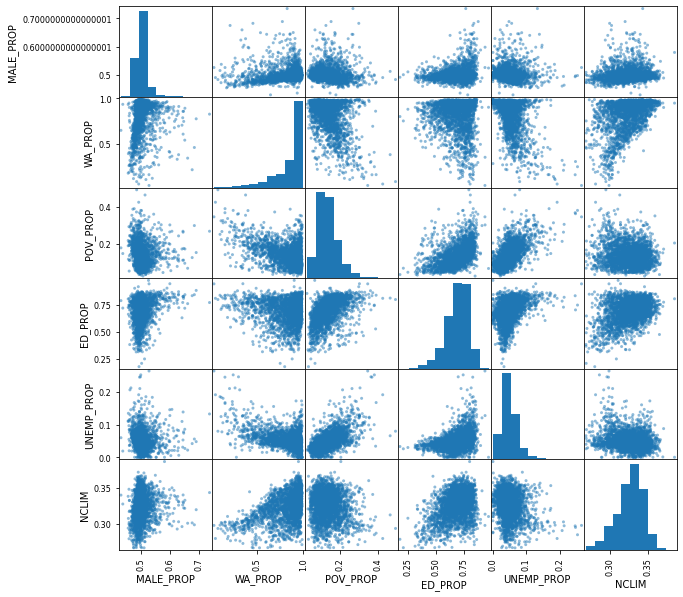

In [26]:
# Defining our x/independent and y/dependent variables.
x = census_joined2.iloc[:,80:85]
y = census_joined2.iloc[:,-1:]

# Making a scatterplot.
plt.rcParams['figure.figsize'] = [10, 10]
scatter2 = pd.concat([x,y], axis = 1)
pd.plotting.scatter_matrix(scatter2)

# Table of correlations
scatter2.corr()

In [27]:
# Pearsons
from scipy.stats import pearsonr
pearson_df2 = census_joined2[["MALE_PROP", "WA_PROP", "POV_PROP", "ED_PROP", "UNEMP_PROP", "NCLIM"]]

pearson_df2.corr(method='pearson', min_periods=1)

,MALE_PROP,WA_PROP,POV_PROP,ED_PROP,UNEMP_PROP,NCLIM
MALE_PROP,1.000000,0.091801,-0.028744,0.196083,-0.030586,0.069564
WA_PROP,0.091801,1.000000,-0.443696,-0.064983,-0.499384,0.493542
POV_PROP,-0.028744,-0.443696,1.000000,0.469082,0.620972,-0.132739
ED_PROP,0.196083,-0.064983,0.469082,1.000000,0.364094,0.379297
UNEMP_PROP,-0.030586,-0.499384,0.620972,0.364094,1.000000,-0.196536
NCLIM,0.069564,0.493542,-0.132739,0.379297,-0.196536,1.000000


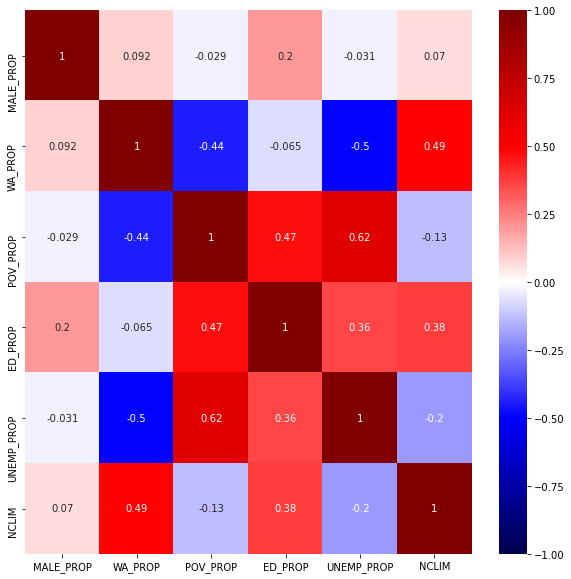

In [28]:
sns.heatmap(pearson_df2.corr(), vmin=-1, vmax=1., square=False, annot = True,cmap = 'seismic');

#### Interpreting analysis and next steps
We conducted analysis of the same nature as with mask use data but with global warming opinions compiled by the Yale study. For parameters of disinformation we included six distinct answers from the 63 options. We selected the following parameters and then took their unweighted means which we categorized as an umbrella parameter of climate change disbelief and disinformation:

* a)Estimated percentage who do not think that global warming is happening
* b)Estimated percentage who think that global warming is caused mostly by natural changes in the environment
* c)Estimated percentage who believe there is a lot of disagreement among scientists about whether or not global warming is happening
* d)Estimated percentage who somewhat/strongly disagree that global warming is affecting the weather in the United States
* e)Estimated percentage who discuss global warming occassionally or often with friends and family
* f)Estimated percentage who hear about global warming in the media several times a year or less often

We contend that first four parameters (a-d) are survey repsonses that have higher probabilities of being associated to disinformation given the drastitic amount of evidence and testable hypotheses presented against such beliefs. For the last two points we took into consideration the effect and propagation that disinformation has in social circles and lack of exposure to news sources that report on scientific findings. 

In the correlation matrix presented previously, we can readily see that there is a moderate positive correlation between our umbrella parameter of disinformation regarding climate change and white individuals as designated by the census bureau. A slight positive correlation can also be seen with educational attainment.

In [29]:
NME= pd.read_csv("~/Downloads/heatmap.csv") #import PLOS medicine dataset into dataframe
NME = NME.dropna() #display dataframe
NME = NME[(NME['NME_Rate']) > 0]

NME = NME.rename(columns={'FIPS_County': 'FIPS'}) #rename column to 'FIPS' to match other datasets
# Convert to string data type.
NME['FIPS'] = NME['FIPS'].astype(str)

# Where the code is less than five digits, add a zero in front. 
NME['FIPS'] = NME['FIPS'].str.zfill(5)

In [30]:
NME['NME_Rate'] = NME['NME_Rate']/100
NME

,School_Year,State,County,FIPS,NME_Count,NME_Rate
32,2016-2017,Idaho,Camas,16025,4.0,0.266667
33,2016-2017,Idaho,Bonner,16017,79.0,0.196517
34,2016-2017,Idaho,Valley,16085,18.0,0.181818
35,2016-2017,Idaho,Custer,16037,6.0,0.171429
36,2016-2017,Idaho,Idaho,16049,22.0,0.160584
...,...,...,...,...,...,...
858,2015-2016,Texas,HIDALGO,48215,39.0,0.002400
859,2015-2016,Texas,RUSK,48401,1.0,0.002300
860,2015-2016,Texas,MAVERICK,48323,2.0,0.002000
861,2015-2016,Arkansas,UNION,05139,1.0,0.001629


In [31]:
census_joined3 = pd.merge(census, poverty[['FIPS','POV_PROP']],on='FIPS', how='left')
census_joined3 = pd.merge(census_joined3, education[['FIPS','ED_PROP']],on='FIPS', how='left')
census_joined3 = pd.merge(census_joined3, unemployment[['FIPS','UNEMP_PROP']],on='FIPS', how='left')
census_joined3 = pd.merge(census_joined3, internet[['FIPS','INT_PROP']],on='FIPS', how='left')
ind = census_joined3['FIPS'].isin(NME['FIPS'])
census_joined3 = census_joined3[ind]
census_joined3 = pd.merge(census_joined3, NME[['FIPS', 'NME_Rate']],on='FIPS', how='left')

In [32]:
census_joined3

,SUMLEV,STATE,FIPS,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE,MALE_PROP,WA_PROP,POV_PROP,ED_PROP,UNEMP_PROP,INT_PROP,NME_Rate
0,50,4,04001,Arizona,Apache County,12,0,71887,35482,36405,...,34,9,9,0.493580,0.222752,0.321675,0.800707,0.106,0.650418,0.023
1,50,4,04003,Arizona,Cochise County,12,0,125922,63757,62165,...,307,136,116,0.506321,0.877249,0.145827,0.654891,0.059,0.174772,0.019
2,50,4,04005,Arizona,Coconino County,12,0,143476,70721,72755,...,177,68,98,0.492912,0.657385,0.177753,0.554044,0.059,0.189415,0.074
3,50,4,04007,Arizona,Gila County,12,0,54018,26789,27229,...,40,25,19,0.495927,0.782276,0.179264,0.723900,0.091,NaN,0.032
4,50,4,04009,Arizona,Graham County,12,0,38837,20809,18028,...,43,22,26,0.535803,0.816618,0.191763,0.743187,0.082,NaN,0.031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,50,55,55133,Wisconsin,Waukesha County,12,0,404198,198880,205318,...,150,51,49,0.492036,0.924720,0.046376,0.459121,0.026,0.078750,0.056
827,50,55,55135,Wisconsin,Waupaca County,12,0,50990,25865,25125,...,28,2,3,0.507256,0.968445,0.092276,0.685230,0.023,NaN,0.093
828,50,55,55137,Wisconsin,Waushara County,12,0,24443,12867,11576,...,7,2,7,0.526408,0.951765,0.099097,0.757975,0.041,NaN,0.057
829,50,55,55139,Wisconsin,Winnebago County,12,0,171907,86428,85479,...,65,16,16,0.502760,0.917915,0.106078,0.608032,0.027,0.139406,0.070


,MALE_PROP,WA_PROP,POV_PROP,ED_PROP,UNEMP_PROP,NME_Rate
MALE_PROP,1.000000,0.093243,-0.080128,0.193501,-0.096019,0.087508
WA_PROP,0.093243,1.000000,-0.354002,0.066739,-0.406863,0.209921
POV_PROP,-0.080128,-0.354002,1.000000,0.402215,0.562526,-0.155167
ED_PROP,0.193501,0.066739,0.402215,1.000000,0.339485,-0.209671
UNEMP_PROP,-0.096019,-0.406863,0.562526,0.339485,1.000000,-0.142283
NME_Rate,0.087508,0.209921,-0.155167,-0.209671,-0.142283,1.000000


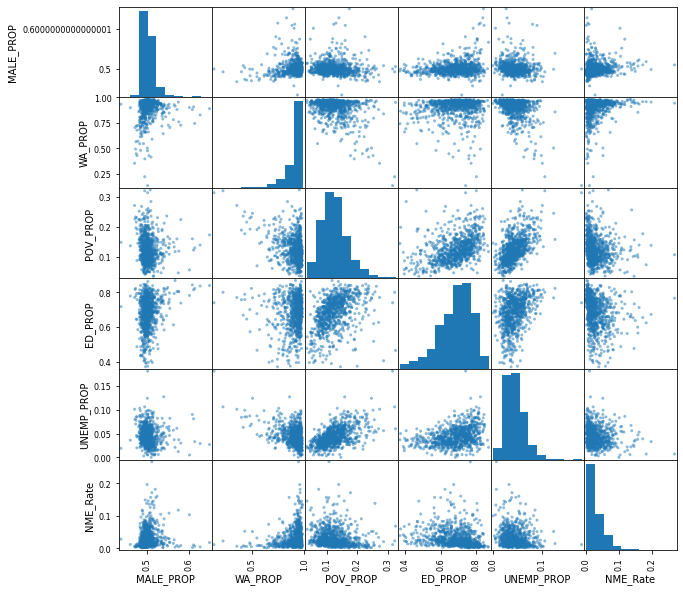

In [33]:
# Defining our x/independent and y/dependent variables.
x = census_joined3.iloc[:,80:85]
y = census_joined3.iloc[:,-1:]

# Making a scatterplot.
plt.rcParams['figure.figsize'] = [10, 10]
scatter3 = pd.concat([x,y], axis = 1)
pd.plotting.scatter_matrix(scatter3)

# Table of correlations
scatter3.corr()

In [34]:
# Pearsons
from scipy.stats import pearsonr
pearson_df3 = census_joined3[["MALE_PROP", "WA_PROP", "POV_PROP", "ED_PROP", "UNEMP_PROP", "NME_Rate"]]

pearson_df3.corr(method='pearson', min_periods=1)

,MALE_PROP,WA_PROP,POV_PROP,ED_PROP,UNEMP_PROP,NME_Rate
MALE_PROP,1.000000,0.093243,-0.080128,0.193501,-0.096019,0.087508
WA_PROP,0.093243,1.000000,-0.354002,0.066739,-0.406863,0.209921
POV_PROP,-0.080128,-0.354002,1.000000,0.402215,0.562526,-0.155167
ED_PROP,0.193501,0.066739,0.402215,1.000000,0.339485,-0.209671
UNEMP_PROP,-0.096019,-0.406863,0.562526,0.339485,1.000000,-0.142283
NME_Rate,0.087508,0.209921,-0.155167,-0.209671,-0.142283,1.000000


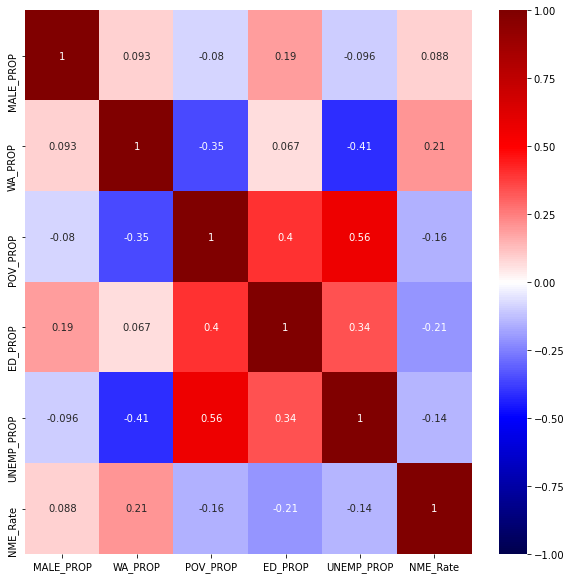

In [35]:
sns.heatmap(pearson_df3.corr(), vmin=-1, vmax=1., square=False, annot = True,cmap = 'seismic');

#### Interpreting analysis 
We see little to no correlation between non medical exemptions and other factors considered. In this particulat set we sampled a small subset of counties in the US compared to the Yale climate study and the NY times mask study that encompassed the majority of the country. Moreover, this dataset was sampled from 2016 to 2017 and a more modernized and robust dataset may provide a more clarified understanding of how disinformation may affect decision to vaccinate. In this specific dataset disinformation may not solely be the reason for individuals to seek out exemptions and other factors may be the reason such as religious beliefs.

## Overall Conclusion

We have found that amongst the US census demographic indicators constrained in this dataset (sex and race) as well as external studies (Mask use during COVID pandemic, Climate Change Beliefs and Non-medical exemption of vaccinations) there are slight relationships that point to disinformation to formulate popular belief on established credible scientific results. The most clear relationships were between our constrained criterion of white individuals and educational attainment. While this is not a result where we can extrapolate overarching themes in the American population, we can see a clear standing that amongst some groups disinformation exists on established scientific findings. The study requires to be more robust in order to better understand the overall information exchange climate in the country. If we begin to view a more targeted sector of the population like QAnon followers, we see that there are patterns within that population that match some of the findings in our study. More analysis needs to be conducted for better understanding.